## imports:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

#### defining graph parameters

In [2]:
mpl.rcParams['figure.figsize'] = (10, 5)
mpl.rcParams['font.size'] = 20

### loading data base

In [3]:
passengers = pd.read_csv('Passengers.csv')


### viewing database

In [4]:
passengers.head()

,time,passengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


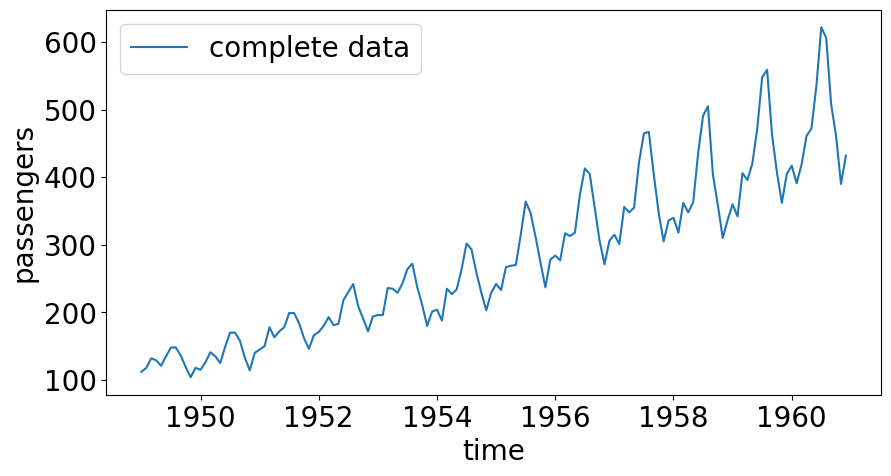

In [5]:
sns.lineplot(x='time', y='passengers', data=passengers, label='complete data')
plt.show()

### preprocessing

In [6]:
passengers_scaler = StandardScaler()

In [7]:
staggered_data = passengers_scaler.fit_transform(passengers)

In [8]:
X = staggered_data[:, 0]
y= staggered_data[:, 1]

In [9]:
X[0:5]

array([-1.72006415, -1.69600731, -1.67195047, -1.64789363, -1.62383679])

In [10]:
 y[0:5]

array([-1.40777884, -1.35759023, -1.24048348, -1.26557778, -1.33249593])

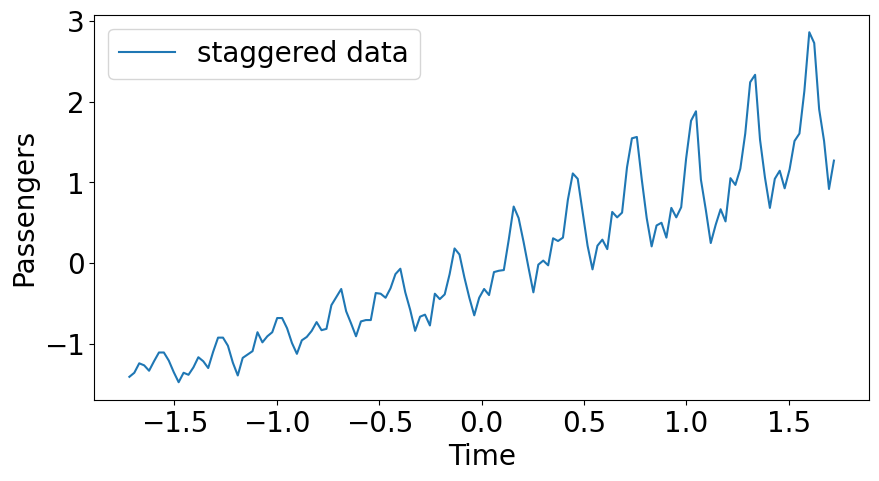

In [11]:
sns.lineplot(x=X, y=y, label= 'staggered data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.show()

### separating training base and test base

In [12]:
training_size = int(len(staggered_data) * 0.9)
test_size = len(staggered_data) - training_size

#### training base

In [13]:
X_training = X[0:training_size]
y_training = y[0:training_size]

#### test base

In [14]:
X_test = X[training_size:len(staggered_data)]
y_test = y[training_size:len(staggered_data)]

In [15]:
X_training.shape, y_training.shape

((129,), (129,))

In [16]:
X_test.shape, y_test.shape

((15,), (15,))

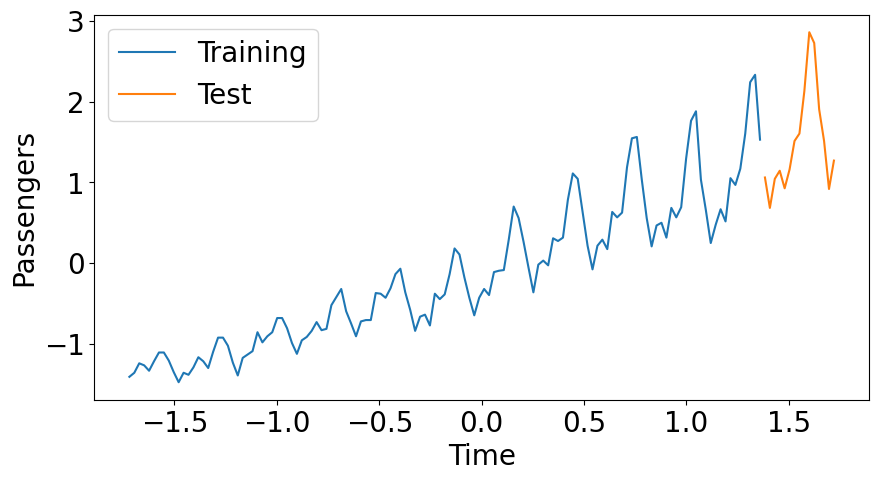

In [17]:
sns.lineplot(x=X_training, y=y_training, label='Training')
sns.lineplot(x=X_test, y=y_test, label='Test')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.show()

## creating one layer regression 

In [18]:
regressor = Sequential([
    Dense(1, input_dim=1, kernel_initializer='Ones', use_bias=False, activation='linear')
])

### compiling

In [19]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### training

In [21]:
regressor.fit(X_training, y_training)

5/5 [==============================] - 0s 2ms/step - loss: 0.1285


In [22]:
y_pred_training = regressor.predict(X_training)

5/5 [==============================] - 0s 1ms/step


## viewing training and testing data

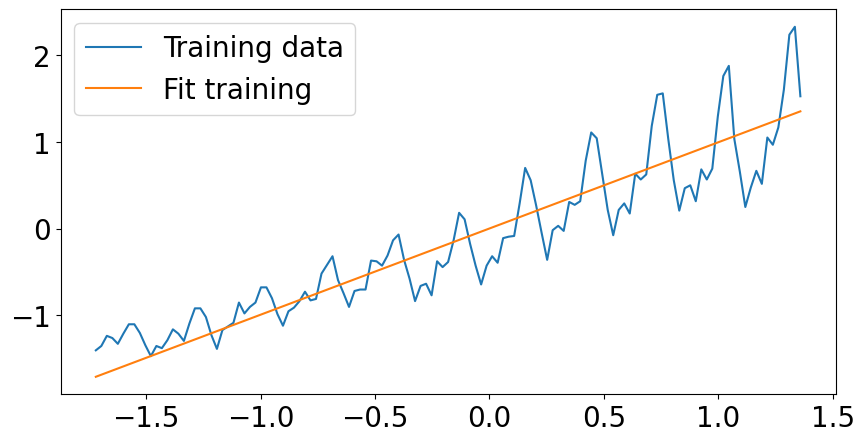

In [23]:
sns.lineplot(x=X_training, y=y_training, label='Training data')
sns.lineplot(x=X_training, y=y_pred_training[:, 0], label='Fit training')
plt.show()

In [24]:
var_temp = {'time': X_training, 'passengers': y_pred_training[:, 0]}

In [25]:
training_results =  pd.DataFrame(data=var_temp)

In [26]:
training_results_inverse = passengers_scaler.inverse_transform(training_results)

In [27]:
training_results_inverse = pd.DataFrame(training_results_inverse)

In [28]:
training_results_inverse.head()

,0,1
0,1949.000000,75.464893
1,1949.083333,78.329686
2,1949.166667,81.194508
3,1949.250000,84.059302
4,1949.333333,86.924124


In [29]:
training_results_inverse.columns = ['time', 'passengers']

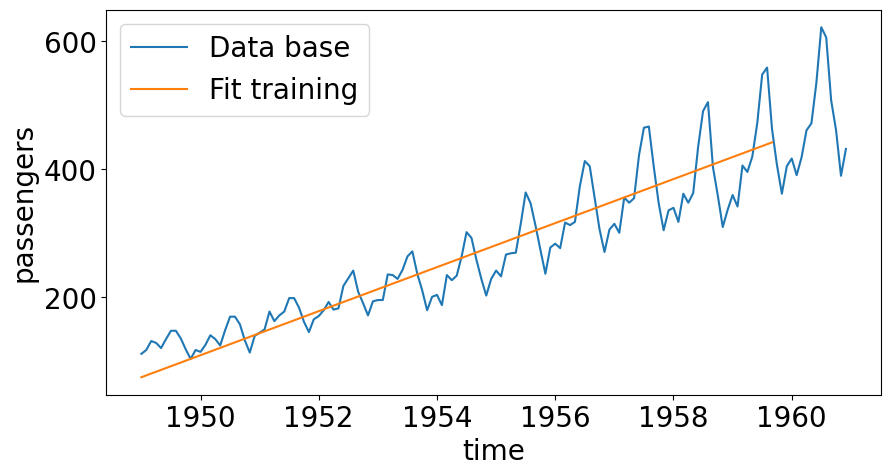

In [30]:
sns.lineplot(x='time', y='passengers', data=passengers, label='Data base')
sns.lineplot(x='time', y='passengers', data=training_results_inverse, label='Fit training')
plt.show()

In [31]:
y_pred_test = regressor.predict(X_test)

1/1 [==============================] - 0s 20ms/step


In [32]:
var_temp2 = {'time': X_test, 'passengers': y_pred_test[:, 0]}

In [33]:
test_results = pd.DataFrame(var_temp2)

In [34]:
test_results_inverse = passengers_scaler.inverse_transform(test_results)

In [35]:
test_results_inverse = pd.DataFrame(test_results_inverse)

In [36]:
test_results_inverse.head()

,0,1
0,1959.750000,445.025022
1,1959.833333,447.889844
2,1959.916667,450.754652
3,1960.000000,453.619445
4,1960.083333,456.484267


In [37]:
test_results_inverse.columns = ['time', 'passengers']

### viewing the final result

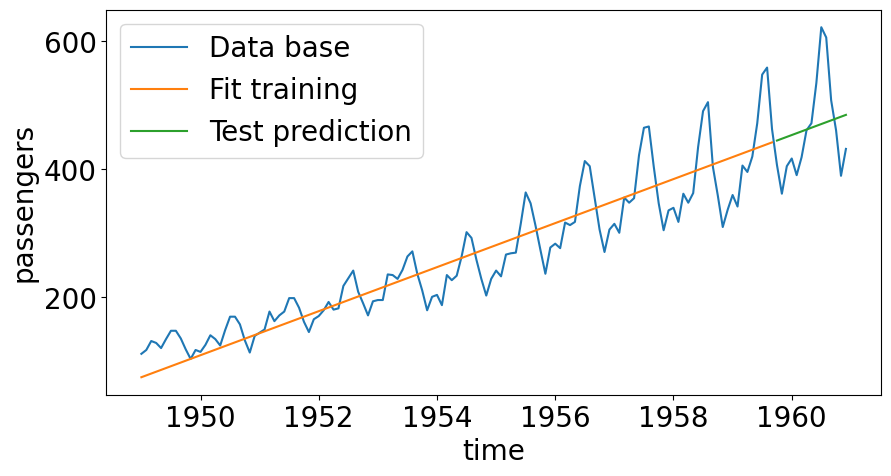

In [38]:
sns.lineplot(x='time', y='passengers', data=passengers, label='Data base')
sns.lineplot(x='time', y='passengers', data=training_results_inverse, label='Fit training')
sns.lineplot(x='time', y='passengers', data=test_results_inverse, label='Test prediction')
plt.show()

## creating multi layers regression 

In [39]:
regressor_mult = Sequential([
    Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False),
    Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False),
    Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False)
])

### compiling

In [40]:
regressor_mult.compile(loss='mean_squared_error', optimizer='adam')

In [41]:
regressor_mult.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### training

In [42]:
regressor_mult.fit(X_training, y_training, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7953
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7911
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7878
Epoch 4/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7855
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7834
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7830
Epoch 7/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7824
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7820
Epoch 9/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7812
Epoch 10/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7811
Epoch 11/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7806
Epoch 12/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7795
Epoch 13/500
5/5 [==============================] - 0s 1ms/st

In [43]:
y_pred_training_multi = regressor_mult.predict(X_training)
y_pred_test_multi = regressor_mult.predict(X_test)

1/1 [==============================] - 0s 43ms/step


## viewing the final result - regressor_mult

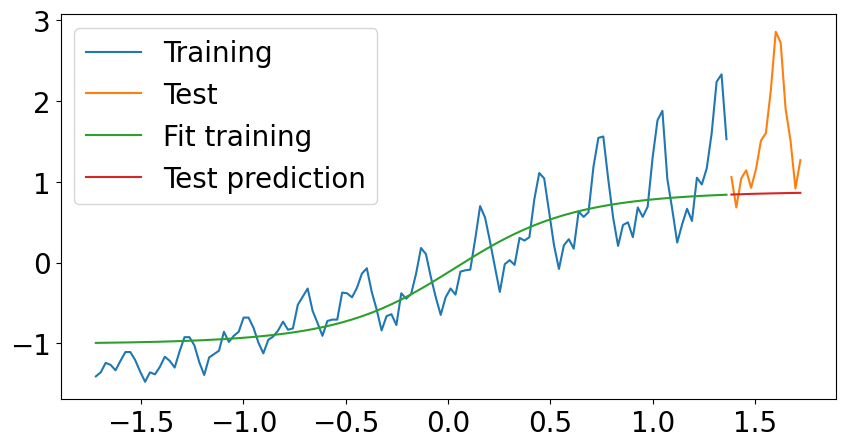

In [44]:
sns.lineplot(x=X_training, y=y_training, label='Training')
sns.lineplot(x=X_test, y=y_test, label='Test')
sns.lineplot(x=X_training, y=y_pred_training_multi[:, 0], label='Fit training')
sns.lineplot(x=X_test, y=y_pred_test_multi[:, 0], label='Test prediction')
plt.show()

## changing data

#### we will only use data from passengers with entry and exit for the regression

#### creating function to define a delay in input data

In [45]:
def separate_data(vetor, n_steps):
    """Input: vector: number of passengers
                n_steps: number of steps in the regressor
      Exit:
               X_new: 2D Array
               y_novo: 1D Array - Our target
    """
    X_new, y_new = [], []
    for i in range(n_steps, vetor.shape[0]):
        X_new.append(list(vetor.loc[i - n_steps:i - 1]))
        y_new.append(vetor.loc[i])
    X_new, y_new = np.array(X_new), np.array(y_new)
    return X_new, y_new

#### defining test and training vectors

In [46]:
vetor_training = pd.DataFrame(y_training)[0]
vetor_test = pd.DataFrame(y_test)[0]

In [47]:
X_training_steps1, y_training_steps1 = separate_data(vetor_training, 1)
X_test_steps1, y_test_steps1 = separate_data(vetor_test, 1)

In [48]:
X_training_steps1[0:5], y_training_steps1[0:5]

(array([[-1.40777884],
        [-1.35759023],
        [-1.24048348],
        [-1.26557778],
        [-1.33249593]]),
 array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918]))

#### there is a delay of one season

## creating multi layers regression with steps = 1

In [49]:
regressor_steps_1 = Sequential([
    Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False),
    Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False),
    Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False)
])

### compiling

In [50]:
regressor_steps_1.compile(loss='mean_squared_error', optimizer='adam')

In [51]:
regressor_steps_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 8         
                                                                 
 dense_5 (Dense)             (None, 64)                512       
                                                                 
 dense_6 (Dense)             (None, 1)                 64        
                                                                 
Total params: 584 (2.28 KB)
Trainable params: 584 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
regressor_steps_1.fit(X_training_steps1, y_training_steps1, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7834
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7656
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7451
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7248
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7087
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6849
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6647
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6397
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6128
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5830
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5529
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5165
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

In [53]:
y_pred_training_steps1 = regressor_steps_1.predict(X_training_steps1)
y_pred_test_steps1 = regressor_steps_1.predict(X_test_steps1)

1/1 [==============================] - 0s 50ms/step


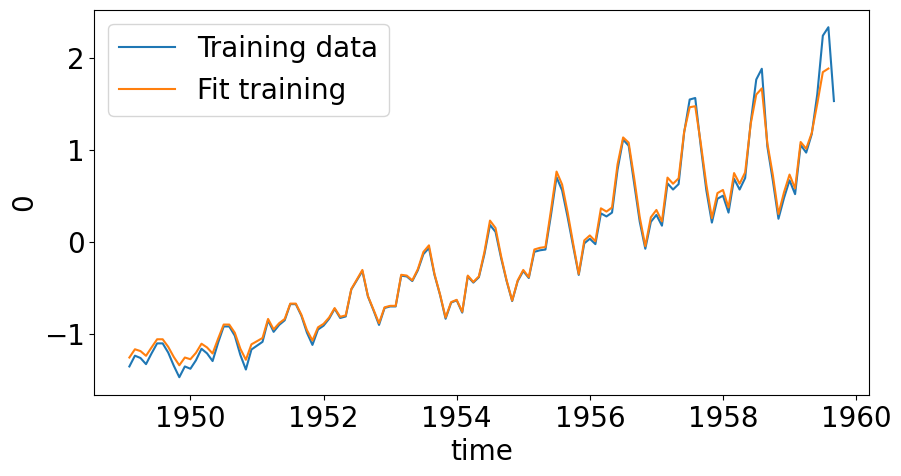

In [54]:
sns.lineplot(x='time', y=y_training_steps1, data=passengers[1:training_size], label='Training data')
sns.lineplot(x='time', y=pd.DataFrame(y_pred_training_steps1)[0], data=passengers[1:training_size], label='Fit training')
plt.show()

## viewing the final result - regressor_mult steps = 1

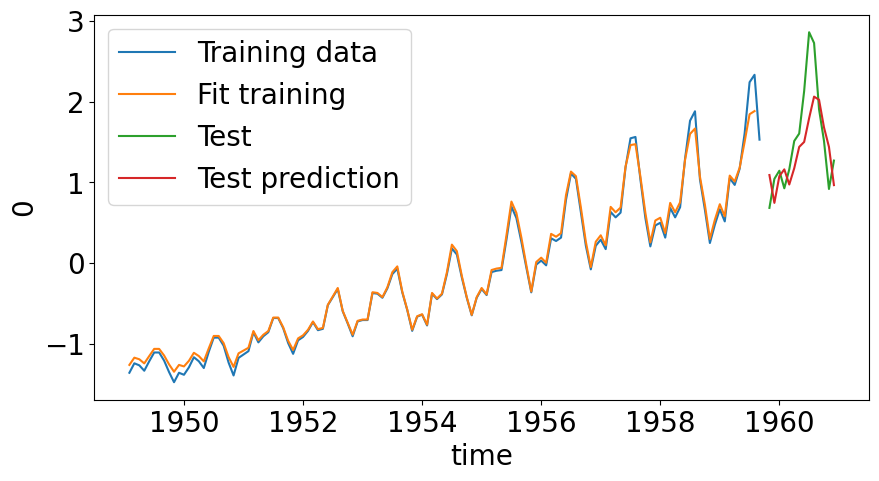

In [55]:
sns.lineplot(x='time', y=y_training_steps1, data=passengers[1:training_size], label='Training data')
sns.lineplot(x='time', y=pd.DataFrame(y_pred_training_steps1)[0], data=passengers[1:training_size], label='Fit training')
sns.lineplot(x='time', y=y_test_steps1, data=passengers[training_size + 1:len(passengers)], label='Test')
sns.lineplot(x='time', y=pd.DataFrame(y_pred_test_steps1)[0].values, data=passengers[training_size + 1:len(passengers)], label='Test prediction')
plt.show()

## creating multi layers regression with steps = 4

In [56]:
X_training_steps4, y_training_steps4 = separate_data(vetor_training, 4)
X_test_steps4, y_test_steps4 = separate_data(vetor_test, 4)

In [57]:
X_training_steps4[0:5], y_training_steps4[0:5]

(array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
        [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
        [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
        [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
        [-1.33249593, -1.21538918, -1.10664719, -1.10664719]]),
 array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441]))

#### there is a delay of four season

In [58]:
regressor_steps_4 = Sequential([
    Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False),
    Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False),
    Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False)
])

### compiling

In [59]:
regressor_steps_4.compile(loss='mean_squared_error', optimizer='adam')

In [60]:
regressor_steps_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 32        
                                                                 
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dense_9 (Dense)             (None, 1)                 64        
                                                                 
Total params: 608 (2.38 KB)
Trainable params: 608 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
regressor_steps_4.fit(X_training_steps4, y_training_steps4, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7376
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.6555
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 0.5903
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 0.5289
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4651
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4020
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3414
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2828
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2370
Epoch 10/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1979
Epoch 11/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1727
Epoch 12/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1607
Epoch 13/300
4/4 [==============================] - 0s 2ms/st

In [62]:
y_pred_training_steps4 = regressor_steps_4.predict(X_training_steps4)
y_pred_test_steps4 = regressor_steps_4.predict(X_test_steps4)

1/1 [==============================] - 0s 23ms/step


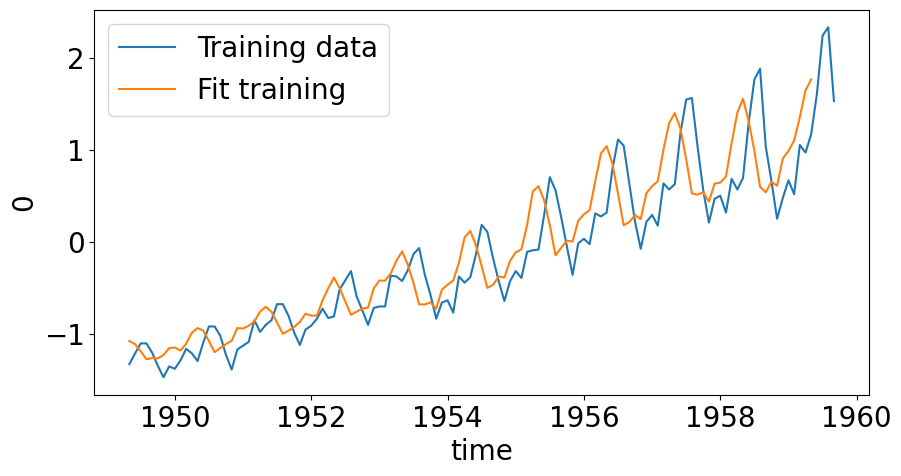

In [63]:
sns.lineplot(x='time', y=y_training_steps4, data=passengers[4:training_size], label='Training data')
sns.lineplot(x='time', y=pd.DataFrame(y_pred_training_steps4)[0], data=passengers[4:training_size], label='Fit training')
plt.show()

#### viewing the final result - regressor_mult steps = 4

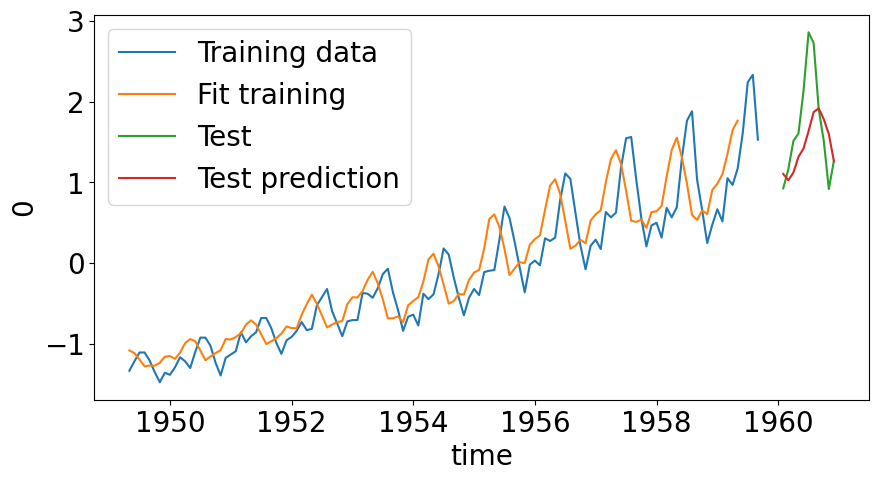

In [64]:
sns.lineplot(x='time', y=y_training_steps4, data=passengers[4:training_size], label='Training data')
sns.lineplot(x='time', y=pd.DataFrame(y_pred_training_steps4)[0], data=passengers[4:training_size], label='Fit training')
sns.lineplot(x='time', y=y_test_steps4, data=passengers[training_size + 4:len(passengers)], label='Test')
sns.lineplot(x='time', y=pd.DataFrame(y_pred_test_steps4)[0].values, data=passengers[training_size + 4:len(passengers)], label='Test prediction')
plt.show()